## Logic Based FizzBuzz Function [Software 1.0]

In [1]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'fizzbuzz'
    elif n % 3 == 0:
        return 'fizz'
    elif n % 5 == 0:
        return 'buzz'
    else:
        return 'other'

## Create Training and Testing Datasets in CSV Format

In [2]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    # Reason for using here:
    # It provides a direct method to convert the 2d dataframe into CSV (easiest way to extact Traning, Testing data set)
    # In general:
    # It has a huge number of built-in methods and attributes (abstracts out many common functions), 
    # which lets us focus on the needed things. Eg. T - Transpose, dot - matrix multiplication, join and etc 
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [3]:
def processData(dataset):
    
    # Why do we have to process?
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [4]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        # Here we are encoding the numbers to their binary form and we know 2^10 = 1024 which means to represent all 
        # numbers till 1024 in binary, we will be needing 10 bits. Our training + testing data set is within 1-1000 
        # which is less than 1024. Therefore we will be needing 10 bits to represent the numbers.
        #
        #
        # We are right shifting each number(10 times) and performing an and-operation with 1 
        # each time to extract the right most bit 
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [5]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "fizzbuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])
    return np_utils.to_categorical(np.array(processedLabel),4)  # to_categorical takes in vector and coverts them to 
                                                                # binary class matrix (fizzbuzz, fizz, buzz, others), 
                                                                # row = processedLabel (0 to number of class)
                                                                # column = class
                                                                # eg. [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]] ==
                                                                #     [0,1,2,3]
                                                                #     [Others, Buzz, Fizz, FizzBuzz]

Using TensorFlow backend.


## Model Definition

In [6]:
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10

drop_out = 0.31 # when 30% - acc 83%, 20% - acc 71%, acc 35% - 79%, acc 31% - 85%, acc 32% - 84%

# In a house of 4, only 1 person knows to cook and cooks everyday. And other 3 where always dependent 
# on the first guy to cook food. The first guy goes on a trip for a week, No food in the house.
# Now the other 3 had to learn cooking for survival. Hence, Got more balance in the house.
#
#
# drop out is used to randomly ignore few neurons during the training period, 
# this makes the other neurons to step up and make up for the missing neurons and predict. Hence, the neural 
# network as a whole wont be very sensitive to spefic weights of neurons. Achiving higher generalization.

first_dense_layer_nodes  = 256 #256
second_dense_layer_nodes = 256 #when 10 accuracy drops to 85
third_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    # We cant just look at the data and start making prediction, why ? we might not have data for all possible 
    # combination, this calls for the need to have models,
    # which takes in data, analyzes and learns patterns from the data.
    # Trys to predict when a new unseen  data comes up.
    #
    #
    # Why use Dense layer and then activation?
    # Dense layer gives the input signal vector(Xi) and associated weights(W) which are needed by 
    # the activation function to produce the desired output. Therefore activation has to be followed only after 
    # dense layer.    
    #
    #
    #
    # Why use sequential model with layers?
    # Because we have single input, single output and layers are stacked one over the other and traversed in order
    # and not re-used. All these make sequential model most suitable for FizzBuzz.
    
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu')) #while using tanh accuracy is constant
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('relu'))
    # Why dropout?
    model.add(Dropout(drop_out))
    
    model.add(Dense(third_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    # in the output layer the four neurons will be having any real number value and not the probabilty 
    # of it belonging to a class. What softmax does is it brings all these values to add to 1, which means,
    # it gives the probablity of the input being in each class
    model.summary()
    
    # Why use categorical_crossentropy?
    # Is good to for classication. Higher Learning rate, you will reach minimize loss
    rmsprop=RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model.compile(optimizer=rmsprop,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [7]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [8]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2816      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1028      
__________

# <font color = blue>Run Model</font>

Train on 720 samples, validate on 180 samples
Epoch 1/1
720/720 [==============================] - 1s 1ms/step - loss: 0.0077 - acc: 0.9972 - val_loss: 0.2481 - val_acc: 0.9500
Train on 720 samples, validate on 180 samples
Epoch 1/10
720/720 [==============================] - 0s 559us/step - loss: 0.0224 - acc: 0.9958 - val_loss: 0.2440 - val_acc: 0.9556
Epoch 2/10
720/720 [==============================] - 0s 538us/step - loss: 0.0155 - acc: 0.9931 - val_loss: 0.2464 - val_acc: 0.9389
Epoch 3/10
720/720 [==============================] - 1s 711us/step - loss: 0.0407 - acc: 0.9875 - val_loss: 0.1960 - val_acc: 0.9556
Epoch 4/10
720/720 [==============================] - 1s 824us/step - loss: 0.0154 - acc: 0.9944 - val_loss: 0.2645 - val_acc: 0.9278
Epoch 5/10
720/720 [==============================] - 1s 922us/step - loss: 0.0065 - acc: 0.9986 - val_loss: 0.2818 - val_acc: 0.9222
Epoch 6/10
720/720 [==============================] - 1s 1ms/step - loss: 0.0176 - acc: 0.9958 - val_loss: 

720/720 [==============================] - 0s 486us/step - loss: 0.0330 - acc: 0.9875 - val_loss: 0.2315 - val_acc: 0.9556
Epoch 50/100
720/720 [==============================] - 0s 655us/step - loss: 0.0095 - acc: 0.9958 - val_loss: 0.2571 - val_acc: 0.9611
Epoch 51/100
720/720 [==============================] - 0s 524us/step - loss: 0.0101 - acc: 0.9972 - val_loss: 0.2460 - val_acc: 0.9556
Epoch 52/100
720/720 [==============================] - 0s 550us/step - loss: 0.0309 - acc: 0.9889 - val_loss: 0.2898 - val_acc: 0.9389
Epoch 53/100
720/720 [==============================] - 1s 714us/step - loss: 0.0112 - acc: 0.9958 - val_loss: 0.2707 - val_acc: 0.9444
Epoch 54/100
720/720 [==============================] - 1s 731us/step - loss: 0.0126 - acc: 0.9931 - val_loss: 0.2724 - val_acc: 0.9444
Epoch 55/100
720/720 [==============================] - 0s 580us/step - loss: 0.0105 - acc: 0.9958 - val_loss: 0.2650 - val_acc: 0.9444
Epoch 56/100
720/720 [==============================] - 0s 54

Epoch 9/1000
720/720 [==============================] - 0s 456us/step - loss: 0.0080 - acc: 0.9986 - val_loss: 0.3180 - val_acc: 0.9278
Epoch 10/1000
720/720 [==============================] - 0s 444us/step - loss: 0.0249 - acc: 0.9931 - val_loss: 0.2808 - val_acc: 0.9444
Epoch 11/1000
720/720 [==============================] - 0s 440us/step - loss: 0.0116 - acc: 0.9972 - val_loss: 0.2197 - val_acc: 0.9611
Epoch 12/1000
720/720 [==============================] - 0s 447us/step - loss: 0.0135 - acc: 0.9958 - val_loss: 0.2483 - val_acc: 0.9556
Epoch 13/1000
720/720 [==============================] - 0s 480us/step - loss: 0.0094 - acc: 0.9958 - val_loss: 0.2179 - val_acc: 0.9611
Epoch 14/1000
720/720 [==============================] - 0s 470us/step - loss: 0.0152 - acc: 0.9944 - val_loss: 0.2906 - val_acc: 0.9444
Epoch 15/1000
720/720 [==============================] - 0s 503us/step - loss: 0.0283 - acc: 0.9958 - val_loss: 0.2640 - val_acc: 0.9444
Epoch 16/1000
720/720 [===================

Epoch 69/1000
720/720 [==============================] - 0s 441us/step - loss: 0.0146 - acc: 0.9944 - val_loss: 0.2278 - val_acc: 0.9556
Epoch 70/1000
720/720 [==============================] - 0s 480us/step - loss: 0.0127 - acc: 0.9944 - val_loss: 0.2476 - val_acc: 0.9500
Epoch 71/1000
720/720 [==============================] - 0s 475us/step - loss: 0.0240 - acc: 0.9903 - val_loss: 0.2008 - val_acc: 0.9556
Epoch 72/1000
720/720 [==============================] - 0s 469us/step - loss: 0.0302 - acc: 0.9944 - val_loss: 0.2555 - val_acc: 0.9389
Epoch 73/1000
720/720 [==============================] - 0s 483us/step - loss: 0.0104 - acc: 0.9958 - val_loss: 0.2253 - val_acc: 0.9500
Epoch 74/1000
720/720 [==============================] - 0s 448us/step - loss: 0.0170 - acc: 0.9931 - val_loss: 0.2441 - val_acc: 0.9500
Epoch 75/1000
720/720 [==============================] - 0s 446us/step - loss: 0.0124 - acc: 0.9958 - val_loss: 0.2171 - val_acc: 0.9444
Epoch 76/1000
720/720 [==================

720/720 [==============================] - 0s 472us/step - loss: 0.0340 - acc: 0.9931 - val_loss: 0.2331 - val_acc: 0.9556
Epoch 129/1000
720/720 [==============================] - 0s 476us/step - loss: 0.0174 - acc: 0.9958 - val_loss: 0.2350 - val_acc: 0.9444
Epoch 130/1000
720/720 [==============================] - 0s 477us/step - loss: 0.0203 - acc: 0.9917 - val_loss: 0.3064 - val_acc: 0.9389
Epoch 131/1000
720/720 [==============================] - 0s 440us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.2330 - val_acc: 0.9500
Epoch 132/1000
720/720 [==============================] - 0s 460us/step - loss: 0.0080 - acc: 0.9972 - val_loss: 0.2634 - val_acc: 0.9556
Epoch 133/1000
720/720 [==============================] - 0s 474us/step - loss: 0.0121 - acc: 0.9972 - val_loss: 0.2061 - val_acc: 0.9556
Epoch 134/1000
720/720 [==============================] - 0s 462us/step - loss: 0.0205 - acc: 0.9958 - val_loss: 0.2681 - val_acc: 0.9389
Epoch 135/1000
720/720 [=========================

720/720 [==============================] - 0s 467us/step - loss: 0.0141 - acc: 0.9931 - val_loss: 0.1711 - val_acc: 0.9611
Epoch 188/1000
720/720 [==============================] - 0s 505us/step - loss: 0.0098 - acc: 0.9972 - val_loss: 0.1789 - val_acc: 0.9611
Epoch 189/1000
720/720 [==============================] - 0s 502us/step - loss: 0.0192 - acc: 0.9917 - val_loss: 0.1934 - val_acc: 0.9556
Epoch 190/1000
720/720 [==============================] - 0s 438us/step - loss: 0.0090 - acc: 0.9972 - val_loss: 0.2248 - val_acc: 0.9500
Epoch 191/1000
720/720 [==============================] - 0s 508us/step - loss: 0.0221 - acc: 0.9958 - val_loss: 0.2187 - val_acc: 0.9500
Epoch 192/1000
720/720 [==============================] - 0s 467us/step - loss: 0.0256 - acc: 0.9944 - val_loss: 0.2347 - val_acc: 0.9556
Epoch 193/1000
720/720 [==============================] - 0s 469us/step - loss: 0.0099 - acc: 0.9972 - val_loss: 0.2526 - val_acc: 0.9500
Epoch 194/1000
720/720 [=========================

720/720 [==============================] - 1s 793us/step - loss: 0.0188 - acc: 0.9903 - val_loss: 0.3252 - val_acc: 0.9222
Epoch 247/1000
720/720 [==============================] - 0s 618us/step - loss: 0.0184 - acc: 0.9917 - val_loss: 0.2676 - val_acc: 0.9389
Epoch 248/1000
720/720 [==============================] - 0s 582us/step - loss: 0.0157 - acc: 0.9986 - val_loss: 0.2545 - val_acc: 0.9500
Epoch 249/1000
720/720 [==============================] - 1s 748us/step - loss: 0.0335 - acc: 0.9903 - val_loss: 0.2625 - val_acc: 0.9556
Epoch 250/1000
720/720 [==============================] - 0s 607us/step - loss: 0.0134 - acc: 0.9931 - val_loss: 0.2339 - val_acc: 0.9444
Epoch 251/1000
720/720 [==============================] - 0s 530us/step - loss: 0.0122 - acc: 0.9931 - val_loss: 0.2439 - val_acc: 0.9444
Epoch 252/1000
720/720 [==============================] - 0s 527us/step - loss: 0.0054 - acc: 0.9972 - val_loss: 0.3148 - val_acc: 0.9333
Epoch 253/1000
720/720 [=========================

720/720 [==============================] - 0s 485us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.2521 - val_acc: 0.9278
Epoch 19/10000
720/720 [==============================] - 0s 502us/step - loss: 0.0106 - acc: 0.9958 - val_loss: 0.2477 - val_acc: 0.9444
Epoch 20/10000
720/720 [==============================] - 0s 609us/step - loss: 0.0269 - acc: 0.9903 - val_loss: 0.2645 - val_acc: 0.9389
Epoch 21/10000
720/720 [==============================] - 0s 497us/step - loss: 0.0143 - acc: 0.9958 - val_loss: 0.2977 - val_acc: 0.9278
Epoch 22/10000
720/720 [==============================] - 0s 557us/step - loss: 0.0072 - acc: 0.9986 - val_loss: 0.2340 - val_acc: 0.9500
Epoch 23/10000
720/720 [==============================] - 0s 506us/step - loss: 0.0120 - acc: 0.9986 - val_loss: 0.2922 - val_acc: 0.9333
Epoch 24/10000
720/720 [==============================] - 0s 533us/step - loss: 0.0171 - acc: 0.9944 - val_loss: 0.2326 - val_acc: 0.9556
Epoch 25/10000
720/720 [=========================

720/720 [==============================] - 0s 488us/step - loss: 0.0369 - acc: 0.9931 - val_loss: 0.2941 - val_acc: 0.9500
Epoch 78/10000
720/720 [==============================] - 0s 550us/step - loss: 0.0111 - acc: 0.9972 - val_loss: 0.2116 - val_acc: 0.9556
Epoch 79/10000
720/720 [==============================] - 0s 494us/step - loss: 0.0069 - acc: 0.9972 - val_loss: 0.2583 - val_acc: 0.9500
Epoch 80/10000
720/720 [==============================] - 0s 551us/step - loss: 0.0111 - acc: 0.9958 - val_loss: 0.2497 - val_acc: 0.9500
Epoch 81/10000
720/720 [==============================] - 0s 471us/step - loss: 0.0385 - acc: 0.9889 - val_loss: 0.2603 - val_acc: 0.9500
Epoch 82/10000
720/720 [==============================] - 0s 552us/step - loss: 0.0106 - acc: 0.9972 - val_loss: 0.2762 - val_acc: 0.9444
Epoch 83/10000
720/720 [==============================] - 0s 506us/step - loss: 0.0156 - acc: 0.9917 - val_loss: 0.2985 - val_acc: 0.9444
Epoch 84/10000
720/720 [=========================

Epoch 7/100000
720/720 [==============================] - 0s 498us/step - loss: 0.0071 - acc: 0.9972 - val_loss: 0.2931 - val_acc: 0.9333
Epoch 8/100000
720/720 [==============================] - 0s 501us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.2606 - val_acc: 0.9500
Epoch 9/100000
720/720 [==============================] - 0s 505us/step - loss: 0.0143 - acc: 0.9958 - val_loss: 0.3159 - val_acc: 0.9333
Epoch 10/100000
720/720 [==============================] - 0s 481us/step - loss: 0.0138 - acc: 0.9958 - val_loss: 0.3045 - val_acc: 0.9389
Epoch 11/100000
720/720 [==============================] - 0s 517us/step - loss: 0.0144 - acc: 0.9944 - val_loss: 0.2799 - val_acc: 0.9333
Epoch 12/100000
720/720 [==============================] - 0s 548us/step - loss: 0.0088 - acc: 0.9972 - val_loss: 0.3456 - val_acc: 0.9333
Epoch 13/100000
720/720 [==============================] - 0s 467us/step - loss: 0.0058 - acc: 0.9972 - val_loss: 0.2834 - val_acc: 0.9389
Epoch 14/100000
720/720 [=====

Epoch 66/100000
720/720 [==============================] - 0s 489us/step - loss: 0.0285 - acc: 0.9917 - val_loss: 0.2152 - val_acc: 0.9611
Epoch 67/100000
720/720 [==============================] - 0s 544us/step - loss: 0.0091 - acc: 0.9958 - val_loss: 0.2789 - val_acc: 0.9389
Epoch 68/100000
720/720 [==============================] - 0s 450us/step - loss: 0.0110 - acc: 0.9986 - val_loss: 0.3408 - val_acc: 0.9389
Epoch 69/100000
720/720 [==============================] - 0s 465us/step - loss: 0.0129 - acc: 0.9944 - val_loss: 0.3406 - val_acc: 0.9333
Epoch 70/100000
720/720 [==============================] - 0s 515us/step - loss: 0.0070 - acc: 0.9986 - val_loss: 0.3342 - val_acc: 0.9389
Epoch 71/100000
720/720 [==============================] - 0s 504us/step - loss: 0.0230 - acc: 0.9903 - val_loss: 0.3978 - val_acc: 0.9111
Epoch 72/100000
720/720 [==============================] - 0s 503us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.2801 - val_acc: 0.9500
Epoch 73/100000
720/720 [==

Epoch 125/100000
720/720 [==============================] - 0s 519us/step - loss: 0.0249 - acc: 0.9931 - val_loss: 0.3414 - val_acc: 0.9222
Epoch 126/100000
720/720 [==============================] - 0s 612us/step - loss: 0.0097 - acc: 0.9944 - val_loss: 0.3259 - val_acc: 0.9278
Epoch 127/100000
720/720 [==============================] - 0s 603us/step - loss: 0.0160 - acc: 0.9958 - val_loss: 0.3831 - val_acc: 0.9167
Epoch 128/100000
720/720 [==============================] - 0s 556us/step - loss: 0.0188 - acc: 0.9931 - val_loss: 0.2785 - val_acc: 0.9389
Epoch 129/100000
720/720 [==============================] - 0s 612us/step - loss: 0.0162 - acc: 0.9917 - val_loss: 0.3194 - val_acc: 0.9278
Epoch 130/100000
720/720 [==============================] - 0s 686us/step - loss: 0.0071 - acc: 0.9972 - val_loss: 0.3624 - val_acc: 0.9222
Epoch 131/100000
720/720 [==============================] - 1s 696us/step - loss: 0.0059 - acc: 0.9972 - val_loss: 0.3066 - val_acc: 0.9333
Epoch 132/100000
720

720/720 [==============================] - 0s 482us/step - loss: 0.0101 - acc: 0.9958 - val_loss: 0.3573 - val_acc: 0.9111
Epoch 184/100000
720/720 [==============================] - 0s 482us/step - loss: 0.0088 - acc: 0.9972 - val_loss: 0.2451 - val_acc: 0.9500
Epoch 185/100000
720/720 [==============================] - 0s 551us/step - loss: 0.0143 - acc: 0.9944 - val_loss: 0.3210 - val_acc: 0.9222
Epoch 186/100000
720/720 [==============================] - 0s 473us/step - loss: 0.0090 - acc: 0.9972 - val_loss: 0.3148 - val_acc: 0.9278
Epoch 187/100000
720/720 [==============================] - 0s 547us/step - loss: 0.0369 - acc: 0.9958 - val_loss: 0.2911 - val_acc: 0.9278
Epoch 188/100000
720/720 [==============================] - 0s 455us/step - loss: 0.0262 - acc: 0.9917 - val_loss: 0.2580 - val_acc: 0.9444
Epoch 189/100000
720/720 [==============================] - 0s 474us/step - loss: 0.0259 - acc: 0.9958 - val_loss: 0.3104 - val_acc: 0.9222
Epoch 190/100000
720/720 [===========

720/720 [==============================] - 0s 667us/step - loss: 0.0244 - acc: 0.9958 - val_loss: 0.2656 - val_acc: 0.9389
Epoch 242/100000
720/720 [==============================] - 0s 557us/step - loss: 0.0056 - acc: 0.9972 - val_loss: 0.2912 - val_acc: 0.9444
Epoch 243/100000
720/720 [==============================] - 0s 607us/step - loss: 0.0119 - acc: 0.9944 - val_loss: 0.3622 - val_acc: 0.9278
Epoch 244/100000
720/720 [==============================] - 0s 486us/step - loss: 0.0147 - acc: 0.9972 - val_loss: 0.4175 - val_acc: 0.9222
Epoch 245/100000
720/720 [==============================] - 0s 643us/step - loss: 0.0068 - acc: 0.9972 - val_loss: 0.3733 - val_acc: 0.9278
Epoch 246/100000
720/720 [==============================] - 0s 637us/step - loss: 0.0084 - acc: 0.9958 - val_loss: 0.3648 - val_acc: 0.9278
Epoch 247/100000
720/720 [==============================] - 0s 489us/step - loss: 0.0198 - acc: 0.9917 - val_loss: 0.4022 - val_acc: 0.9333
Epoch 248/100000
720/720 [===========

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c3a1a0828>,
      dtype=object)

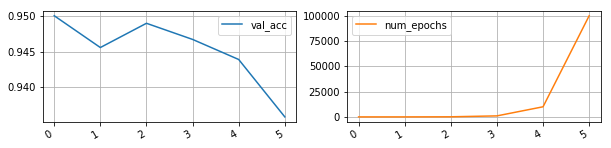

In [20]:
validation_data_split = 0.2
num_epochs = 10 # is one full pass of the all the samples that we have, eg. if the batch_size=10
                   # total dataset(sample) we have is 10000, to complete one epoch it will take 1000 batches
model_batch_size = 90 #128 # batch size is number of sample that we pass to the model at one time, mainly depends on the
                      # computation power of the system
tb_batch_size = 32 #32
early_patience = 100
h = {'val_acc':[], 'num_epochs':[]}
for i in range(6):
    tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)

    # Early stopping is a way to stop training when your loss starts to increase (decrease in validation),
    # here we monitor is  validation loss
    # 'patience' argument is the number of epochs before stopping, once your loss starts to increase (stops improving)
    # 'mode' is to tell keras to look for change in increase or decrease , if min is given it observes for decrease 
    earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

    # Read Dataset
    dataset = pd.read_csv('training.csv')

    # Process Dataset
    processedData, processedLabel = processData(dataset)
    history = model.fit(processedData
                        , processedLabel
                        , validation_split=validation_data_split
                        , epochs=num_epochs**i
                        , batch_size=model_batch_size
                        , callbacks = [tensorboard_cb,earlystopping_cb]
                       )
    %matplotlib inline
    df = pd.DataFrame(history.history)
    df.plot(subplots=True, grid=True, figsize=(10,5), layout=(2,2))
    h['val_acc'].append(sum(history.history['val_acc'])/len(history.history['val_acc']))
    h['num_epochs'].append(num_epochs**i)
%matplotlib inline
df = pd.DataFrame(h)
df.plot(subplots=True, grid=True, figsize=(10,5), layout=(2,2))


# <font color = blue>Training and Validation Graphs</font>

     val_loss   val_acc      loss       acc
0    0.279964  0.933333  0.016370  0.994444
1    0.223766  0.966667  0.015155  0.995833
2    0.256963  0.933333  0.017281  0.994444
3    0.289812  0.933333  0.018573  0.991667
4    0.322292  0.933333  0.016096  0.994444
5    0.295064  0.938889  0.021703  0.993056
6    0.293083  0.933333  0.007111  0.997222
7    0.260575  0.950000  0.005301  1.000000
8    0.315852  0.933333  0.014322  0.995833
9    0.304464  0.938889  0.013771  0.995833
10   0.279891  0.933333  0.014404  0.994444
11   0.345551  0.933333  0.008834  0.997222
12   0.283427  0.938889  0.005813  0.997222
13   0.372666  0.922222  0.049076  0.990278
14   0.268632  0.950000  0.009475  0.995833
15   0.346840  0.933333  0.010040  0.995833
16   0.318746  0.933333  0.015235  0.993056
17   0.304776  0.938889  0.025839  0.993056
18   0.232122  0.955556  0.014974  0.995833
19   0.319996  0.933333  0.021422  0.990278
20   0.343805  0.922222  0.007317  0.997222
21   0.297172  0.927778  0.02116

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c39172e48>,
      dtype=object)

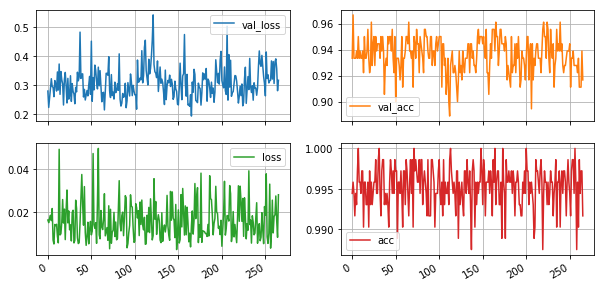

In [21]:
#from keras.utils import plot_model
#plot_model(history, to_file='model.png')
%matplotlib inline
df = pd.DataFrame(history.history)
print(df)
df.plot(subplots=True, grid=True, figsize=(10,5), layout=(2,2))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [23]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "other"
    elif encodedLabel == 1:
        return "fizz"
    elif encodedLabel == 2:
        return "buzz"
    elif encodedLabel == 3:
        return "fizzbuzz"

In [22]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

output = {}
output["input"] = testData['input']
output["label"] = testData['label']
output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

NameError: name 'decodeLabel' is not defined